In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA 

In [0]:
pd.set_option('display.max_columns',False)

In [0]:
df = pd.read_csv('bank-additional/bank-additional-full.csv',sep = ';')

In [9]:
df.shape

(41188, 21)

In [10]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [11]:
df[df.isna().any(1)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [13]:
df.columns[df.dtypes == 'object']

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [0]:
cat_columns = df.columns[df.dtypes == 'object']

In [0]:
for col in cat_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [16]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [17]:
df.columns[df.dtypes == 'object']

Index([], dtype='object')

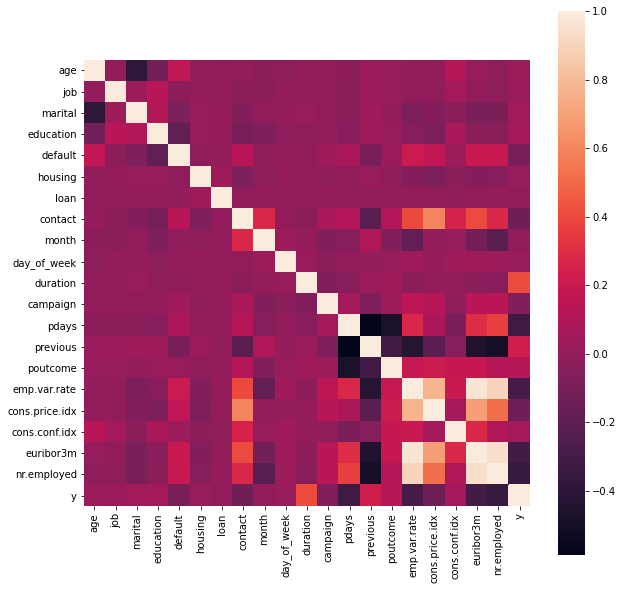

In [18]:
corr = df.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr,square = True)

In [0]:
X = df.drop('y',1)
y = df.y

In [20]:
X.mean()

age                 40.024060
job                  3.724580
marital              1.172769
education            3.747184
default              0.208872
housing              1.071720
loan                 0.327425
contact              0.365252
month                4.230868
day_of_week          2.004613
duration           258.285010
campaign             2.567593
pdays              962.475454
previous             0.172963
poutcome             0.930101
emp.var.rate         0.081886
cons.price.idx      93.575664
cons.conf.idx      -40.502600
euribor3m            3.621291
nr.employed       5167.035911
dtype: float64

In [0]:
ss = StandardScaler()
X_std = ss.fit_transform(X)

In [22]:
X_std

array([[ 1.53303429, -0.20157925, -0.2837415 , ...,  0.88644656,
         0.71245988,  0.33167991],
       [ 1.62899323,  0.91122681, -0.2837415 , ...,  0.88644656,
         0.71245988,  0.33167991],
       [-0.29018564,  0.91122681, -0.2837415 , ...,  0.88644656,
         0.71245988,  0.33167991],
       ...,
       [ 1.53303429,  0.35482378, -0.2837415 , ..., -2.22495344,
        -1.49518647, -2.8156966 ],
       [ 0.38152696,  1.46762984, -0.2837415 , ..., -2.22495344,
        -1.49518647, -2.8156966 ],
       [ 3.26029527,  0.35482378, -0.2837415 , ..., -2.22495344,
        -1.49518647, -2.8156966 ]])

In [0]:
X_std_df = pd.DataFrame(X_std,columns = X.columns)

In [24]:
X_std_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.533034,-0.201579,-0.283741,-1.753925,-0.513600,-1.087707,-0.452491,1.31827,0.762558,-0.718834,0.010471,-0.565922,0.195414,-0.349494,0.192622,0.648092,0.722722,0.886447,0.71246,0.33168
1,1.628993,0.911227,-0.283741,-0.349730,1.945327,-1.087707,-0.452491,1.31827,0.762558,-0.718834,-0.421501,-0.565922,0.195414,-0.349494,0.192622,0.648092,0.722722,0.886447,0.71246,0.33168
2,-0.290186,0.911227,-0.283741,-0.349730,-0.513600,0.942127,-0.452491,1.31827,0.762558,-0.718834,-0.124520,-0.565922,0.195414,-0.349494,0.192622,0.648092,0.722722,0.886447,0.71246,0.33168
3,-0.002309,-1.036184,-0.283741,-1.285860,-0.513600,-1.087707,-0.452491,1.31827,0.762558,-0.718834,-0.413787,-0.565922,0.195414,-0.349494,0.192622,0.648092,0.722722,0.886447,0.71246,0.33168
4,1.533034,0.911227,-0.283741,-0.349730,-0.513600,-1.087707,2.311440,1.31827,0.762558,-0.718834,0.187888,-0.565922,0.195414,-0.349494,0.192622,0.648092,0.722722,0.886447,0.71246,0.33168


In [25]:
X_std_df.mean()

age               2.846557e-16
job              -3.143338e-15
marital          -3.737972e-14
education        -2.145619e-15
default          -5.307998e-14
housing          -4.828356e-14
loan              1.783602e-15
contact           1.167897e-13
month             2.064064e-15
day_of_week       3.742186e-15
duration         -3.170967e-16
campaign          1.845337e-14
pdays             9.515119e-14
previous          2.196991e-13
poutcome         -1.095530e-14
emp.var.rate     -1.851020e-13
cons.price.idx   -5.933520e-14
cons.conf.idx    -6.842191e-14
euribor3m        -6.864230e-14
nr.employed      -1.181213e-13
dtype: float64

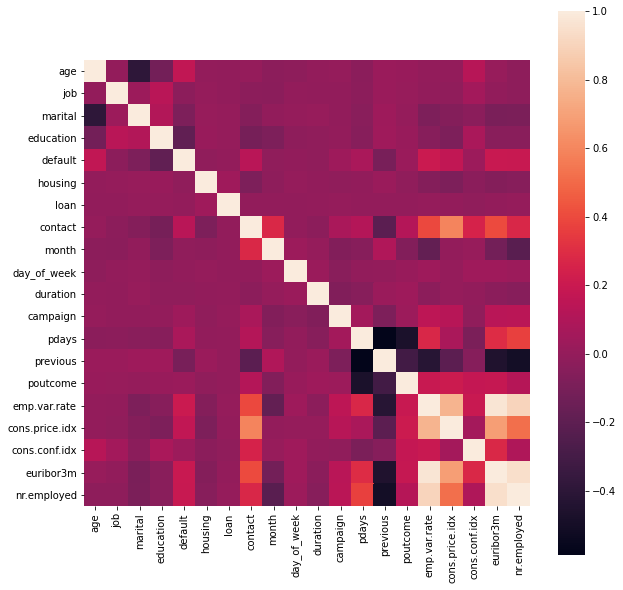

In [26]:
X_std_df_corr = X_std_df.corr()
plt.figure(figsize = (10,10))
sns.heatmap(X_std_df_corr,square = True)

In [27]:
X_std_cov = np.cov(X_std.T)
np.shape(X_std_cov)

(20, 20)

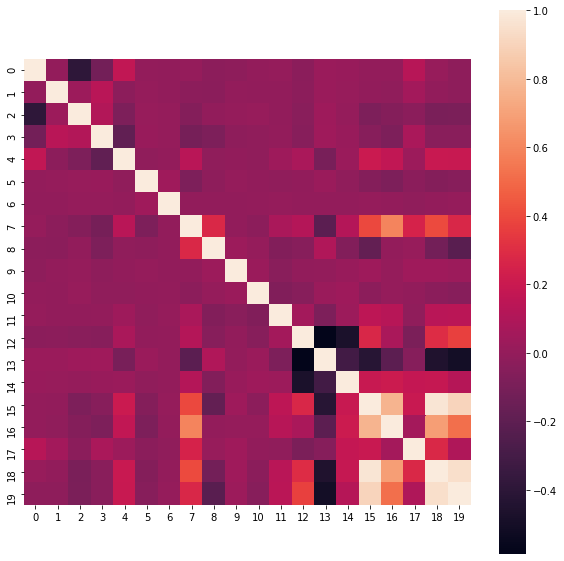

In [28]:
plt.figure(figsize = (10,10))
sns.heatmap(X_std_cov,square = True)

In [0]:
eigen_values,eigen_vectors = np.linalg.eigh(X_std_cov)

In [30]:
eigen_values

array([0.00700286, 0.02045531, 0.07052839, 0.2564046 , 0.55388825,
       0.584921  , 0.74397625, 0.86050816, 0.9104288 , 0.92608682,
       0.95388662, 0.98703258, 1.00653639, 1.03491175, 1.09072109,
       1.13936455, 1.35815957, 1.54129953, 1.68476232, 4.26961076])

In [31]:
np.sort(eigen_values)[::-1]

array([4.26961076, 1.68476232, 1.54129953, 1.35815957, 1.13936455,
       1.09072109, 1.03491175, 1.00653639, 0.98703258, 0.95388662,
       0.92608682, 0.9104288 , 0.86050816, 0.74397625, 0.584921  ,
       0.55388825, 0.2564046 , 0.07052839, 0.02045531, 0.00700286])

In [0]:
sorted_eig_vals = []
sorted_eig_vecs = []
for val,vec in sorted(zip(eigen_values,eigen_vectors),reverse = True):
    sorted_eig_vals.append(val)
    sorted_eig_vecs.append(vec)

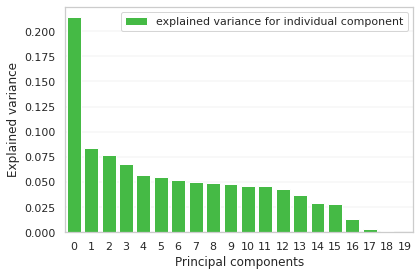

In [33]:
sns.set(style="whitegrid")
plt.grid(linewidth=0.25)
sns.barplot(x=list(range(len(sorted_eig_vals))), y=sorted_eig_vals/sum(sorted_eig_vals),
            label='explained variance for individual component',color='limegreen')
plt.ylabel('Explained variance')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

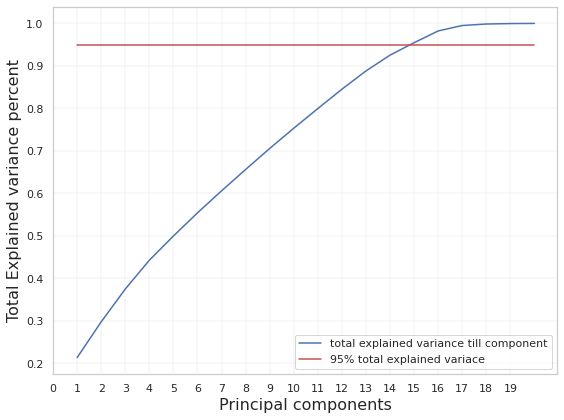

In [34]:
total_explained_variance = np.array(sorted_eig_vals).cumsum()/sum(sorted_eig_vals)
plt.figure(figsize = (8,6))
plt.grid(linewidth=0.25)
plt.plot(range(1,len(sorted_eig_vals)+1),total_explained_variance,label='total explained variance till component')
plt.plot(range(1,len(sorted_eig_vals)+1),[0.95]*len(sorted_eig_vals),'r-',label = '95% total explained variace')
plt.ylabel('Total Explained variance percent', fontsize=16)
plt.xlabel('Principal components', fontsize=16)
plt.xticks(range(len(sorted_eig_vals)))
plt.legend(loc='best')
plt.tight_layout()

In [0]:
#selecting 15 principal components as they add upto 95% of total explained variance

#Note: It is not mandatory to select as many components so that they cover 95% of total explained variance , usually 
#       70-80% of total explained variance is enough while deciding the no. of PC's

pcs = 15
# we need to create a projection matrix to convert features to the new sub-space
stack_vectors = []
for i in range(pcs):
    stack_vectors.append(sorted_eig_vecs[i].reshape(len(sorted_eig_vecs[i]),1))
projection_matrix_w = np.hstack(stack_vectors)

In [36]:
np.shape(projection_matrix_w)

(20, 15)

In [0]:
#dot product of the projection matrix and the original space gives the new feature space
new_feature_space = X_std.dot(projection_matrix_w)

In [38]:
np.shape(X_std),np.shape(new_feature_space)

((41188, 20), (41188, 15))

In [39]:
new_df = pd.DataFrame(new_feature_space,columns = ['V'+str(x) for x in range(np.shape(new_feature_space)[1])])

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
0,0.636660,1.977266,-0.238452,-1.076627,-0.398075,0.327995,0.187767,-1.174569,-1.089410,-1.063151,0.184117,0.752385,0.740428,-0.343814,-0.697451
1,-1.104882,1.423838,0.216840,-0.358256,0.266418,0.303560,-0.067311,-0.778024,-1.135945,-1.078813,0.206557,-0.227637,1.049730,-0.545688,-0.363146
2,-0.175116,-0.063695,-0.152315,0.178442,1.003749,0.333224,-0.140580,-0.659460,-1.256062,-1.166917,0.353623,0.187088,0.869282,-0.406659,-0.552742
3,1.539783,0.704396,0.089979,-0.332496,-0.522124,0.389365,0.162632,-1.048380,-1.135437,-1.062630,0.105032,0.926021,0.412474,-0.553060,-0.435477
4,-0.609132,1.676226,-0.916790,-0.424136,0.529959,0.582342,-0.146752,-0.942271,-1.163565,-1.088270,0.480979,1.412521,0.134321,-0.299663,-0.867762


In [40]:
final_df = pd.concat([new_df,y],axis = 1)
final_df.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,y
0,0.636660,1.977266,-0.238452,-1.076627,-0.398075,0.327995,0.187767,-1.174569,-1.089410,-1.063151,0.184117,0.752385,0.740428,-0.343814,-0.697451,0
1,-1.104882,1.423838,0.216840,-0.358256,0.266418,0.303560,-0.067311,-0.778024,-1.135945,-1.078813,0.206557,-0.227637,1.049730,-0.545688,-0.363146,0
2,-0.175116,-0.063695,-0.152315,0.178442,1.003749,0.333224,-0.140580,-0.659460,-1.256062,-1.166917,0.353623,0.187088,0.869282,-0.406659,-0.552742,0
3,1.539783,0.704396,0.089979,-0.332496,-0.522124,0.389365,0.162632,-1.048380,-1.135437,-1.062630,0.105032,0.926021,0.412474,-0.553060,-0.435477,0
4,-0.609132,1.676226,-0.916790,-0.424136,0.529959,0.582342,-0.146752,-0.942271,-1.163565,-1.088270,0.480979,1.412521,0.134321,-0.299663,-0.867762,0


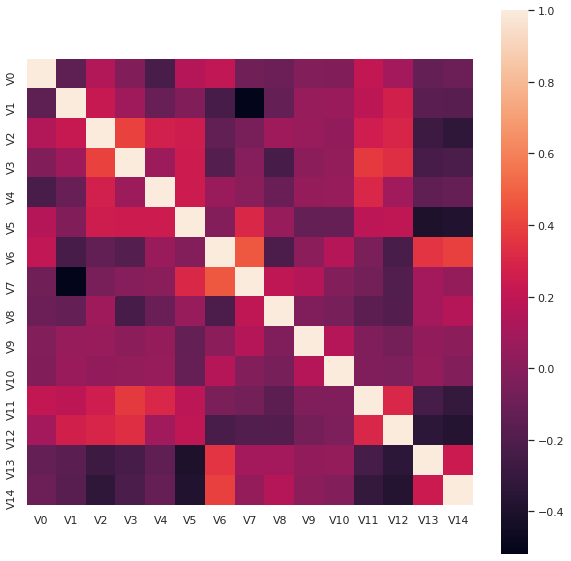

In [41]:
plt.figure(figsize = (10,10))
sns.heatmap(new_df.corr(),square = True)

In [0]:
# the very same analysis can be done using python libraries -- using SVD & PCA
# SVD for singular value decomposition i.e.,principal components and PCA for new feature space
#import scipy
u, s, v = scipy.linalg.svd(X_std.T, full_matrices=True)

In [43]:
s

array([419.34765808, 263.42039685, 251.95536099, 236.51325209,
       216.62642405, 211.95171489, 206.45801055, 203.60799198,
       201.62566975, 198.21132177, 195.30165829, 193.64356733,
       188.25979229, 175.04899223, 155.21321203, 151.03971504,
       102.76447039,  53.89668474,  29.02572959,  16.98313394])

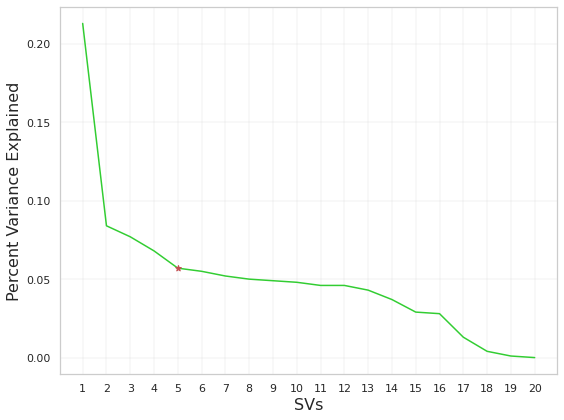

In [65]:
eigen_values = np.round(s**2/np.sum(s**2), decimals=3)

plt.figure(figsize = (8,6))
plt.grid(linewidth=0.25)
sns.lineplot(x=list(range(1,len(eigen_values)+1)),
            y=eigen_values, color="limegreen")
plt.scatter(5,eigen_values[4],color = 'r',marker = '*',zorder = 10)
plt.xlabel('SVs', fontsize=16)
plt.ylabel('Percent Variance Explained', fontsize=16)
plt.xticks(range(1,21))
plt.tight_layout()

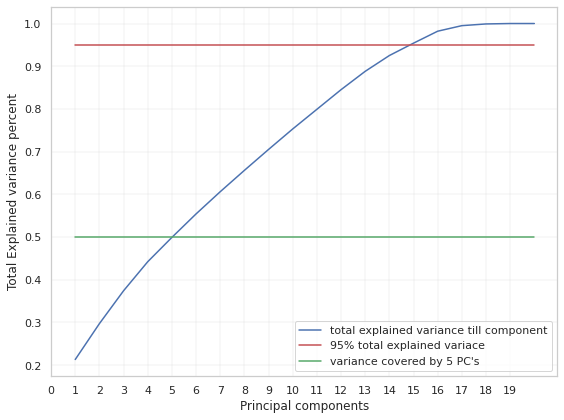

In [66]:
#explained_var = np.array(s**2).cumsum()/sum(np.array(s**2))
total_explained_variance = explained_var.cumsum()/sum(explained_var)

plt.figure(figsize=(8,6))
plt.grid(linewidth=0.25)
plt.plot(range(1,len(explained_var)+1),total_explained_variance,label='total explained variance till component')
plt.plot(range(1,len(explained_var)+1),[0.95]*len(explained_var),'r-',label = '95% total explained variace')
plt.plot(range(1,len(explained_var)+1),[0.5]*len(explained_var),'g-',label = "variance covered by 5 PC's")
plt.ylabel('Total Explained variance percent')
plt.xlabel('Principal components')
plt.xticks(range(len(explained_var)))
plt.legend(loc='best')
plt.tight_layout()

In [73]:
#selecting 5 principal components based on the scree plot
#Note: While selecting the number of principal components there is no fixed value usually smaller number
#      of PC's contain most of the information i.e., total explained variance

#from sklearn.decomposition import PCA 
pca = PCA(n_components=5) 
principalComponents = pca.fit_transform(X_std) 
principalDf = pd.DataFrame(data = principalComponents,columns = ['V'+str(x) for x in range(np.shape(principalComponents)[1])])
print('The explained variance is ',pca.explained_variance_ratio_)
print("Total variance covered by {} pc's is {}".format(pca.n_components_,np.sum(pca.explained_variance_ratio_)))
principalDf.head(5) # prints the top 5 rows

The explained variance is  [0.21347532 0.08423605 0.07701391 0.06780565 0.0569415 ]
Total variance covered by 5 pc's is 0.49947242660221775


,V0,V1,V2,V3,V4
0,-1.633021,1.221959,1.637780,0.750003,-0.431613
1,-1.892187,1.322109,1.731891,0.275379,-1.181787
2,-1.437075,0.697272,-0.116446,0.816370,-1.082745
3,-1.606209,0.835789,0.850668,1.427860,-0.050874
4,-1.545787,1.154430,0.776060,0.302334,-1.223532


In [74]:
#since 5 PC's are not covering much of the variance we'll go the next edge value in scree plot 
# components 15 & 16 almost cover equal variance so we'll choose 15

pca2 = PCA(n_components=15) 
principalComponents2 = pca2.fit_transform(X_std) 
principalDf2 = pd.DataFrame(data = principalComponents2,columns = ['V'+str(x) for x in range(np.shape(principalComponents2)[1])])
print('The explained variance is ',pca2.explained_variance_ratio_)
print("Total variance covered by {} pc's is {}".format(pca2.n_components_,np.sum(pca2.explained_variance_ratio_)))
principalDf2.head(5) # prints the top 5 rows

The explained variance is  [0.21347535 0.08423607 0.07706311 0.06790633 0.05696684 0.05453473
 0.05174433 0.0503256  0.04935043 0.04769317 0.04630322 0.04552034
 0.04302436 0.03719791 0.02924534]
Total variance covered by 15 pc's is 0.9545871317673892


,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
0,-1.633893,1.220856,1.679132,0.787346,-0.443977,-0.254886,-0.660905,-0.784893,0.642226,0.352250,0.008484,-0.451847,-0.304615,-1.479285,0.615401
1,-1.892403,1.321681,1.740295,0.270571,-1.174348,0.239619,-0.684300,-0.307109,0.690285,-0.775293,-1.562226,-0.405109,0.252759,0.488279,0.350896
2,-1.437338,0.696879,-0.093653,0.845131,-1.091596,-0.064370,0.622309,-0.333717,0.475866,-1.219126,0.533166,-0.301543,-0.549879,-0.849785,-0.158263
3,-1.606226,0.835584,0.858031,1.413030,-0.030683,-0.081554,-0.601134,-1.048949,0.255937,0.695911,0.249092,-1.044624,-0.239469,-1.037021,-0.050050
4,-1.546763,1.153343,0.822043,0.360532,-1.246052,0.070921,1.288390,0.133513,1.776191,1.433250,-1.050423,0.195480,-0.483059,-0.752264,0.657821
